In [1]:
import cv2
import pandas as pd
import time
import deepface
from deepface import DeepFace
import mediapipe
# import dlib
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('emotion.csv')

### FPS record for input video

In [26]:
cap = cv2.VideoCapture("demos4.mp4")
prev_frame_time = 0
new_frame_time = 0
font=cv2.FONT_HERSHEY_SIMPLEX
while(True):
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.resize(frame, (500, 300))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)
    cv2.putText(frame,fps,(7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
    cv2.imshow('frame',frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Facial analysis in demo

In [3]:
cap = cv2.VideoCapture(0)
# df.drop('Unnamed: 0',axis=1,inplace=True)
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]

prev_frame_time = 0
  
# used to record the time at which we processed current frame
new_frame_time = 0

start_time = time.time()                             
while(True):

    ret,frame = cap.read()
    if not ret:
        break
#     gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray,1.2,5)

#     for (x,y,w,h) in faces:
#         rec=cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
#         cv2.imshow('frame',rec)
       
#     start_time = time.time()
    emotion=' '
    seconds = 0
    current_time = time.ctime()
    c_time = time.time()
    elapsed_time = c_time - start_time
#     start_time=c_time
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)
    font = cv2.FONT_HERSHEY_SIMPLEX
    if int(elapsed_time)>=seconds:
#         DeepFace.stream(db_path = r"C:\Users\karnb\.deepface\weights")
        result = DeepFace.analyze(img_path = frame , actions=['emotion'], enforce_detection=False,detector_backend=backends[4])
        emotion = result[0]['dominant_emotion']
#         exp=result[0]['dominant_emotion']
        time1=current_time.split(' ')[-2]
        start_time=c_time
              
        for dicts in result:
            x, y, w, h = dicts['region']['x'], dicts['region']['y'], dicts['region']['w'], dicts['region']['h']
            emotion = dicts['dominant_emotion']
            txt = str(emotion)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),1)
#             cv2.imshow('frame',rec)
            df1 = pd.DataFrame({"Emotion":txt,"Time elapsed": time1}, index=[1])
            df = df.append(df1)
#             start_time = time.time()
            cv2.putText(frame,txt,(x+20,y+20),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,0,255),3)
            cv2.putText(frame, fps, (7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
            cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
        
        

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.61it/s]


In [4]:
x,y,w,h

(249, 62, 168, 216)

In [5]:
frame.shape

(480, 640, 3)

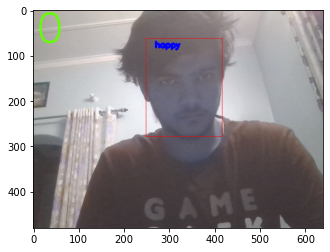

In [7]:
plt.imshow(frame)


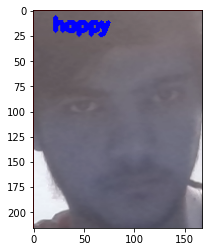

In [18]:

face1=frame[y:y+h,x:x+w,:]
plt.imshow(face1)


In [19]:
face1.shape

(216, 168, 3)

In [20]:
# FACE RECOGNITION USING EMBEDDINGS
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
embedding_objs = DeepFace.represent(img_path = face1, enforce_detection=False ,
      model_name = models[2]
)

In [12]:
embedding_objs

[{'embedding': [0.2167036235332489,
   -0.3117501139640808,
   -0.8763772249221802,
   0.4777146577835083,
   0.0535074807703495,
   0.5118387341499329,
   -0.6625646352767944,
   0.38338595628738403,
   -0.1730426698923111,
   0.43159282207489014,
   0.4873855710029602,
   0.8055617213249207,
   0.1607484668493271,
   -0.5511505007743835,
   0.040710799396038055,
   -0.6466538906097412,
   0.33313795924186707,
   0.6387110352516174,
   0.07565252482891083,
   -0.46149247884750366,
   -0.7285188436508179,
   0.37811562418937683,
   0.9010920524597168,
   -0.830218493938446,
   -0.34114813804626465,
   -0.0716271698474884,
   0.12873323261737823,
   -0.0005185138434171677,
   -0.269540011882782,
   -0.06378726661205292,
   -0.18179087340831757,
   0.19354556500911713,
   -0.0015590135008096695,
   -0.06730195879936218,
   -0.094168521463871,
   -0.0017765467055141926,
   -0.008268646895885468,
   -0.22532373666763306,
   -0.7328984141349792,
   0.2787873446941376,
   -0.2009580731391906

In [21]:
result

[{'emotion': {'angry': 5.385821129355595e-10,
   'disgust': 1.124117255956368e-16,
   'fear': 0.002650784699653741,
   'happy': 99.86875653266907,
   'sad': 0.024191007832996547,
   'surprise': 6.83232604607037e-11,
   'neutral': 0.10440056212246418},
  'dominant_emotion': 'happy',
  'region': {'x': 249, 'y': 62, 'w': 168, 'h': 216}}]

In [15]:
cap.release()
cv2.destroyAllWindows()

In [21]:
type(frame)

numpy.ndarray

In [44]:
frame.shape

(480, 640, 3)

In [45]:
len(result)

1

In [22]:
for emo in result:
    print(result[0]['dominant_emotion'])

happy


In [23]:
df

,Emotion,Time elapsed
1,angry,22:07:59
1,fear,22:08:08
1,neutral,22:08:10
1,fear,22:08:12
1,fear,22:08:13
1,happy,22:08:15
1,fear,22:08:16
1,fear,22:08:18
1,fear,22:08:20
1,fear,22:08:21


In [49]:
current_time

'Sat May 13 13:00:37 2023'

In [50]:
type(start_time)

float

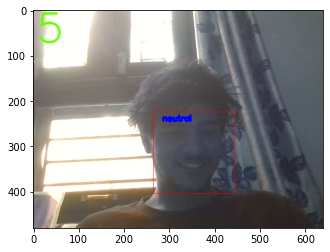

In [68]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [13]:
# cv2.imwrite('abcd.jpg', frame)

True

In [21]:
# ab = cv2.imread('abcd.jpg')
# res = DeepFace.analyze(img_path = ab , actions=['emotion'], enforce_detection=False,detector_backend=backends[3])

1/1 [==============================] - 0s 284ms/step


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.27it/s]


In [22]:
res

[{'emotion': {'angry': 4.526828974485397,
   'disgust': 0.15692259185016155,
   'fear': 11.704836785793304,
   'happy': 0.016700109699741006,
   'sad': 72.25940227508545,
   'surprise': 0.05982333095744252,
   'neutral': 11.275480687618256},
  'dominant_emotion': 'sad',
  'region': {'x': 494, 'y': 56, 'w': 39, 'h': 49}},
 {'emotion': {'angry': 5.507329851388931,
   'disgust': 0.0002450256260999595,
   'fear': 2.0037097856402397,
   'happy': 0.8910847827792168,
   'sad': 0.08469963795505464,
   'surprise': 80.88330626487732,
   'neutral': 10.629628598690033},
  'dominant_emotion': 'surprise',
  'region': {'x': 328, 'y': 51, 'w': 45, 'h': 62}}]